In [8]:
wd <- dirname(getwd())
source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd,"/mission_control/isofox_help.R"))
load(paste0(REF_DIR,"human_gene_signatures.RData"))

library(dplyr)
library(tidyverse)
library(data.table)

#args <- commandArgs(trailing = TRUE) ## "RawTPM" or "AdjTPM" #
args <- list("AdjTPM")

In [9]:
wd

[1] "/workspace/projects/hartwig/biomarkers/repo/hartwig_biomarkers"

In [10]:
REF_DIR

[1] "/workspace/datasets/hartwig/20220809/biomarkers/ref/"

### Read in Hartwig Genes

In [24]:
isofox <- fread(paste0( TMP_DIR,"isofox_",args[1],"_features.csv"))
isofox_genes <- unlist(lapply(colnames(isofox)[-1], function(i) strsplit(i, "_")[[1]][2]))

In [25]:
#a <- readRDS( paste0( REF_DIR, "human_gene_signatures.Rds") )

### Read in TGFB sets and explore

In [26]:
tgfb_sets <- read.csv(paste0(REF_DIR, "battle_tgfb_sets.csv"), sep = ";", stringsAsFactors = FALSE)
tgfb_sets <- lapply(tgfb_sets, toupper)
#names(tgfb_sets) <- paste0("gene_set_", names(tgfb_sets))

In [28]:
battle_all <- unique(unlist(tgfb_sets))

In [31]:
missing <- battle_all[-which(battle_all %in% isofox_genes)]

In [33]:
tgfb_sets

$battle_tgfb_mf_Spp1
 [1] "ARG1"   "SPP1"   "CCL24"  "FABP5"  "HILPDA" "FN1"    "ADAM8"  "F10"   
 [9] "VEGFA"  "EMP1"   ""       ""       ""       ""       ""       ""      
[17] ""       ""       ""       ""       ""       ""      

$battle_tgfb_mf_C1Q
 [1] "C1QA"   "C1QC"   "C1QB"   "MS4A7"  "AXL"    "TGFBR1" "CD72"   "CD81"  
 [9] "CD63"   "NTPCR"  ""       ""       ""       ""       ""       ""      
[17] ""       ""       ""       ""       ""       ""      

$battle_tgfb_caf_spp1
 [1] "MGP"      "SPP1"     "SERPINE2" "LPL"      "ANK"      "COL8A1"  
 [7] "LTBP2"    "ITGB5"    "SLC20A1"  "SEMA7A"   ""         ""        
[13] ""         ""         ""         ""         ""         ""        
[19] ""         ""         ""         ""        

$battle_tgfb_caf_Pdgfra
 [1] "SAA3"    "CXCL9"   "C3"      "COL6A5"  "CXCL10"  "IGF1"    "IGFBP4" 
 [8] "HP"      "LY6A"    "IFITM1"  "AOC1"    "DPT"     "C1S1"    "CCL19"  
[15] "FTH1"    "HSD11B1" ""        ""        ""        ""        ""       
[22] ""       

$battle_tgfb_caf_Lrrc15_Fibroblasts
 [1] "COL12A1" "POSTN"   "COL1A1"  "CRABP1"  "H19"     "COL1A2"  "COL7A1" 
 [8] "CTHRC1"  "THBS2"   "LRRC15"  ""        ""        ""        ""       
[15] ""        ""        ""        ""        ""        ""        ""       
[22] ""       

$battle_tcell_gzmk_cd8
 [1] "CCL5"     "GZMK"     "EPSTI1"   "MS4A6B"   "TRBV12-1" "CXCR3"   
 [7] "IFI27L2A" "ITGA4"    "S100A10"  "LY6C2"    "LAPTM5"   "GM30054" 
[13] "S100A6"   "MS4A4B"   "GIMAP7"   ""         ""         ""        
[19] ""         ""         ""         ""        

$battle_tcell_effector_cd8
 [1] "NR4A2"    "AY036118" "GM42418"  "DENND4A"  "LARS2"    "STAT3"   
 [7] "RGS1"     "FOSL2"    "AES"      "DGAT1"    "GNAS"     "DUSP5"   
[13] "GM47015"  "PFN1"     "IL21R"    "ARF5"     "CTLA4"    "IKZF2"   
[19] "ITGAV"    "MALAT1"   "JUND"     "HNRNPH1" 

$battle_tcell_term_diff_cd8
 [1] "CAPG"    "GM156"   "TNFRSF9" "TIGIT"   "CCL4"    "CCL3"    "PDCD1"  
 [8] "GZMA"    "CXCR6"   "PRF1"    "LITAF"   "CST7"    "CD8A"    "BHLHE40"
[15] "LAT2"    ""        ""        ""        ""        ""        ""       
[22] ""

In [50]:
colnames(isofox %>% select( contains("AY")))

[1] "isofox_ATCAY"       "isofox_EIF1AY"      "isofox.nr_FAM41AY1"
[4] "isofox.nr_FAM41AY2" "isofox_LAYN"        "isofox_SAYSD1"

In [35]:
sort(missing[-seq(5)])

[1] "AES"      "AY036118" "GM156"    "GM30054"  "GM42418"  "GM47015" 
 [7] "IFI27L2A" "LY6C2"    "MS4A4B"   "MS4A6B"

In [45]:
missing_map <- list(
    'ANK' = 'ANK1',
    'SAA3' = NULL,
    'C1S1' = 'C1S',
    'LY6A' = NULL,
    'AES' = 'TLE5',
    'IFI27L2A' = 'IFI27L2',
    'AY036118' = NULL, 
    'GM156' = NULL, 
    'GM30054' = NULL,
    'GM42418' = NULL, 
    'GM47015' = NULL, 
    'LY6C2' = NULL, 
    'MS4A4B' = NULL,
    'MS4A6B' = NULL
)

In [47]:
clean_list <- function( ll ){
    clean_list <- c()
    for( i in ll ){
        if(i != ""){
            if( i %in% names(missing_map) ){ 
                i <- missing_map[[i]] 
            }
            clean_list <- c(clean_list,i)
        }
    }
    clean_list
}
tidy_battle <- list()
for( i in names(tgfb_sets)){
    tidy_battle[[i]] <- clean_list(tgfb_sets[[i]])
}

In [49]:
tidy_battle

$battle_tgfb_mf_Spp1
 [1] "ARG1"   "SPP1"   "CCL24"  "FABP5"  "HILPDA" "FN1"    "ADAM8"  "F10"   
 [9] "VEGFA"  "EMP1"  

$battle_tgfb_mf_C1Q
 [1] "C1QA"   "C1QC"   "C1QB"   "MS4A7"  "AXL"    "TGFBR1" "CD72"   "CD81"  
 [9] "CD63"   "NTPCR" 

$battle_tgfb_caf_spp1
 [1] "MGP"      "SPP1"     "SERPINE2" "LPL"      "ANK1"     "COL8A1"  
 [7] "LTBP2"    "ITGB5"    "SLC20A1"  "SEMA7A"  

$battle_tgfb_caf_Pdgfra
 [1] "CXCL9"   "C3"      "COL6A5"  "CXCL10"  "IGF1"    "IGFBP4"  "HP"     
 [8] "IFITM1"  "AOC1"    "DPT"     "C1S"     "CCL19"   "FTH1"    "HSD11B1"

$battle_tgfb_caf_Lrrc15_Fibroblasts
 [1] "COL12A1" "POSTN"   "COL1A1"  "CRABP1"  "H19"     "COL1A2"  "COL7A1" 
 [8] "CTHRC1"  "THBS2"   "LRRC15" 

$battle_tcell_gzmk_cd8
 [1] "CCL5"     "GZMK"     "EPSTI1"   "TRBV12-1" "CXCR3"    "IFI27L2" 
 [7] "ITGA4"    "S100A10"  "LAPTM5"   "S100A6"   "GIMAP7"  

$battle_tcell_effector_cd8
 [1] "NR4A2"   "DENND4A" "LARS2"   "STAT3"   "RGS1"    "FOSL2"   "TLE5"   
 [8] "DGAT1"   "GNAS"    "DUSP5"   "PFN1"    "IL21R"   "ARF5"    "CTLA4"  
[15] "IKZF2"   "ITGAV"   "MALAT1"  "JUND"    "HNRNPH1"

$battle_tcell_term_diff_cd8
 [1] "CAPG"    "TNFRSF9" "TIGIT"   "CCL4"    "CCL3"    "PDCD1"   "GZMA"   
 [8] "CXCR6"   "PRF1"    "LITAF"   "CST7"    "CD8A"    "BHLHE40" "LAT2"

In [51]:
saveRDS(tidy_battle, paste0( REF_DIR,"battle_gene_set.Rds"))

#### 0 - Read in raw data

In [17]:
isofox <- fread(paste0( TMP_DIR,"isofox_",args[1],"_features.csv"))
isofox_genes <- unlist(lapply(colnames(isofox)[-1], function(i) strsplit(i, "_")[[1]][2]))

In [19]:
length(isofox_genes); isofox_genes[1:10]

[1] 37985

[1] "A1BG"      "A1BG-AS1"  "A1CF"      "A2M"       "A2M-AS1"   "A2ML1"    
 [7] "A2ML1-AS1" "A2ML1-AS2" "A2MP1"     "A3GALT2"

#### 1 - Transform

In [10]:
isofox2 <- isofox %>% mutate_at(vars(-sampleId), ~(log(.+1) %>% as.vector))

#### 2 - Add gene sets 

In [11]:
names(human_gene_signatures) <- gsub(" ", "_", names(human_gene_signatures))
names(human_gene_signatures) <- unlist(lapply(names(human_gene_signatures), function(i) paste0("gene_set_hm_", i)))
gene_sets_comb <- c(gene_sets, human_gene_signatures, tidy_tgfb)

##### Edit the gene sets (update names, few genes missing)

In [12]:
appender <- function(ll) unlist(lapply( ll, function(i) gsub("-",".",paste0("isofox_", i))))
for (i in names(gene_sets_comb)) gene_sets_comb[[i]] <- appender(gene_sets_comb[[i]])
missing <- unique(unlist(gene_sets_comb)[which(!unlist(gene_sets_comb) %in% colnames(isofox))])

remover <- function(ll) ll[which(!(ll %in% missing))]
for (i in names(gene_sets_comb)) gene_sets_comb[[i]] <- remover(gene_sets_comb[[i]])                                      
names(gene_sets_comb) <- appender(names(gene_sets_comb))

#### 1 - Compute Gene Sets 

In [14]:
gene_sets_comb[['isofox_gene_set_hm_Histones']] <- NULL

In [15]:
gene_sets_ls <- list()
for (i in names(gene_sets_comb)){
    print(i)
    flush.console()
    tmp <- isofox2 %>% select(gene_sets_comb[[i]])
    gene_sets_ls[[i]] <- apply(tmp, 1, mean, na.rm = TRUE)
}
gene_sets_final <- data.frame(gene_sets_ls)
gene_sets_final$sampleId <- isofox2 %>% pull(sampleId)

[1] "isofox_gene_set_cyt"
[1] "isofox_gene_set_t_cell_gep_6"
[1] "isofox_gene_set_t_cell_gep_10"
[1] "isofox_gene_set_t_cell_gep_18"
[1] "isofox_gene_set_prolif"
[1] "isofox_gene_set_tim3"
[1] "isofox_gene_set_t_cell_effector"
[1] "isofox_gene_set_myeloid_inflammation"
[1] "isofox_gene_set_stroma_emt_shortened"
[1] "isofox_gene_set_Pan_TBRS"
[1] "isofox_gene_set_impres"
[1] "isofox_gene_set_12_chemokine"
[1] "isofox_gene_set_immune_checkpoint_genes"
[1] "isofox_gene_set_cd8_t_effector"
[1] "isofox_gene_set_infiltrate"
[1] "isofox_gene_set_t_cell_rand1"
[1] "isofox_gene_set_prolif_rand1"
[1] "isofox_gene_set_tgfb_rand1"
[1] "isofox_gene_set_hm_CD_8_T_effector"
[1] "isofox_gene_set_hm_DDR"
[1] "isofox_gene_set_hm_APM"
[1] "isofox_gene_set_hm_Immune_Checkpoint"
[1] "isofox_gene_set_hm_CC_Reg"
[1] "isofox_gene_set_hm_Fanconi"
[1] "isofox_gene_set_hm_gene19"
[1] "isofox_gene_set_hm_tcga"
[1] "isofox_gene_set_hm_EMT1"
[1] "isofox_gene_set_hm_EMT2"
[1] "isofox_gene_set_hm_EMT3"
[1] "isofox_ge

In [25]:
?corrplot

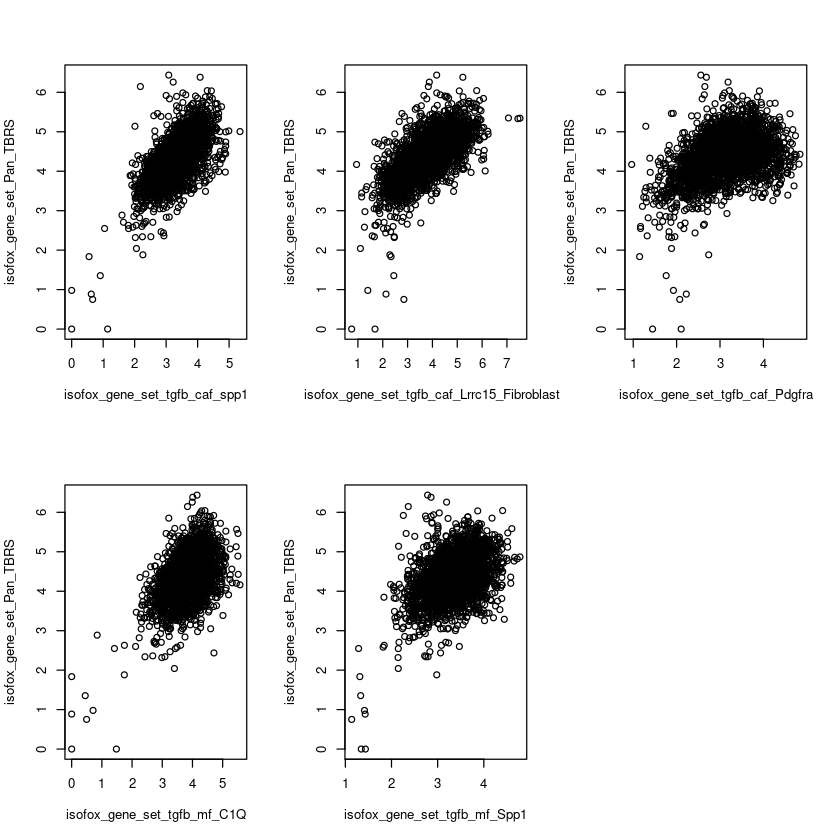

In [37]:
par(mfrow = c(2,3))
plot( isofox_gene_set_Pan_TBRS ~ isofox_gene_set_tgfb_caf_spp1, data = gene_sets_final)
plot( isofox_gene_set_Pan_TBRS ~ isofox_gene_set_tgfb_caf_Lrrc15_Fibroblasts, data = gene_sets_final)
plot( isofox_gene_set_Pan_TBRS ~ isofox_gene_set_tgfb_caf_Pdgfra, data = gene_sets_final)
plot( isofox_gene_set_Pan_TBRS ~ isofox_gene_set_tgfb_mf_C1Q, data = gene_sets_final)
plot( isofox_gene_set_Pan_TBRS ~ isofox_gene_set_tgfb_mf_Spp1, data = gene_sets_final)

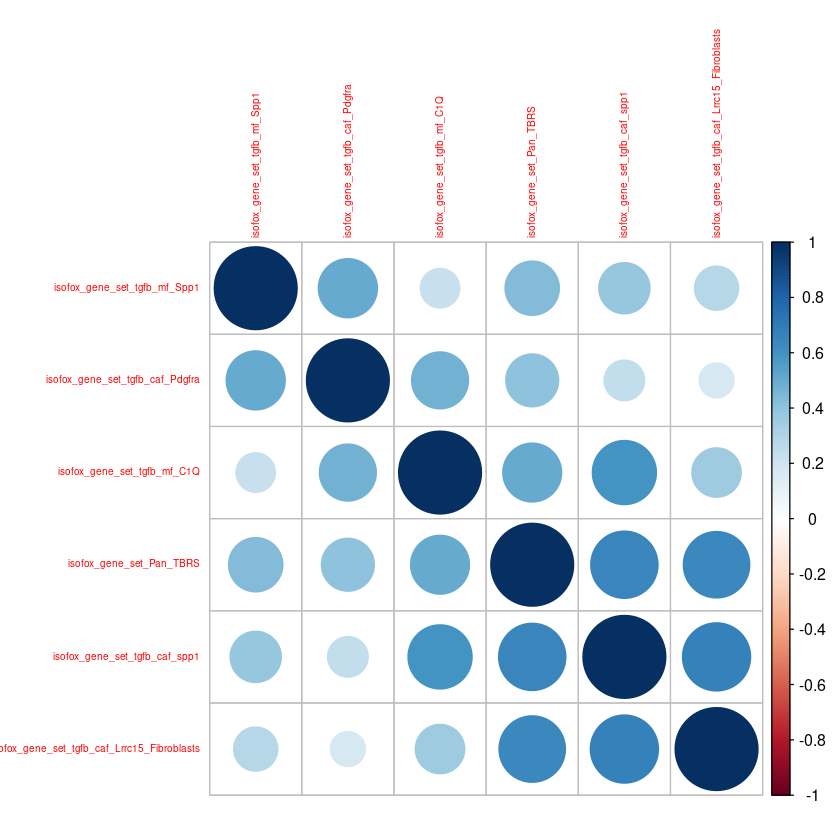

In [30]:
library(corrplot)
corrplot(
 cor( gene_sets_final %>% select(contains("TBRS"), contains("tgfb"), -contains("rand"))), 
      order = "hclust", tl.cex = .5
)

In [21]:
#corrplot(tmp)

##### Create gene set ref

In [31]:
gene_map <- list()
for( i in names(gene_sets)){
    gene_map[[i]] <- surgeon(i)
    for (j in gene_sets[[i]]){
        nice_name <- surgeon(j)
        if( length(gene_map[[j]]) == 0){
            gene_map[[j]] <- surgeon(i)
        }
    }
}
gene_map <- data.frame( gene_set_typ = t(data.frame(gene_map))); 
gene_map$feature <- rownames(gene_map); 
gene_map <- gene_map %>% relocate(feature)
rownames(gene_map) <- NULL

In [32]:
saveRDS(gene_map, paste0(REF_DIR,"gene_set_map.Rds"))

#### 3 - Format for Univariate Scan

In [33]:
happy_isofox <- isofox2 %>% left_join(gene_sets_final, by = "sampleId")
rownames(happy_isofox) <- NULL

#### 4 - Save for scan analyses

In [33]:
fwrite( happy_isofox, file= paste0( TMP_DIR, "isofox_", args[1], "_ready.csv") )